In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [7]:
df = pd.read_csv('/content/sample_data/uber.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143010 entries, 0 to 143009
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         143010 non-null  int64  
 1   key                143010 non-null  object 
 2   fare_amount        143010 non-null  float64
 3   pickup_datetime    143009 non-null  object 
 4   pickup_longitude   143009 non-null  float64
 5   pickup_latitude    143009 non-null  float64
 6   dropoff_longitude  143008 non-null  float64
 7   dropoff_latitude   143008 non-null  float64
 8   passenger_count    143009 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 9.8+ MB


In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [11]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
f= df.assign(
second = df.pickup_datetime.dt.second,
minute = df.pickup_datetime.dt.minute,
hour = df.pickup_datetime.dt.hour,
day= df.pickup_datetime.dt.day,
month = df.pickup_datetime.dt.month,
year = df.pickup_datetime.dt.year,
dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143008 entries, 0 to 143008
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        143008 non-null  float64
 1   pickup_longitude   143008 non-null  float64
 2   pickup_latitude    143008 non-null  float64
 3   dropoff_longitude  143008 non-null  float64
 4   dropoff_latitude   143008 non-null  float64
 5   passenger_count    143008 non-null  float64
dtypes: float64(6)
memory usage: 7.6 MB


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0


In [18]:
incorrect_coordinates = df.loc[
(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
(df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
(df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
(df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

In [19]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
  long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
  dist_long = long2 - long1
  dist_lati = lati2 - lati1
  a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
  c = 2 * np.arcsin(np.sqrt(a)) * 6371
  return c
# long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
# c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin

In [ ]:
df['Distance'] = distance_transform(
df['pickup_longitude'],
df['pickup_latitude'],
df['dropoff_longitude'],
df['dropoff_latitude']
)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475450


Text(0, 0.5, 'fare_amount')

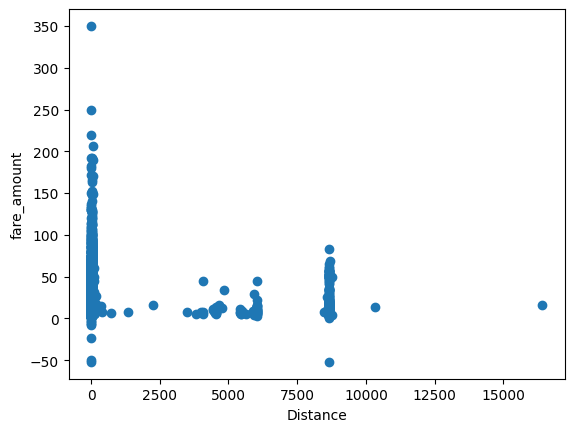

In [ ]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

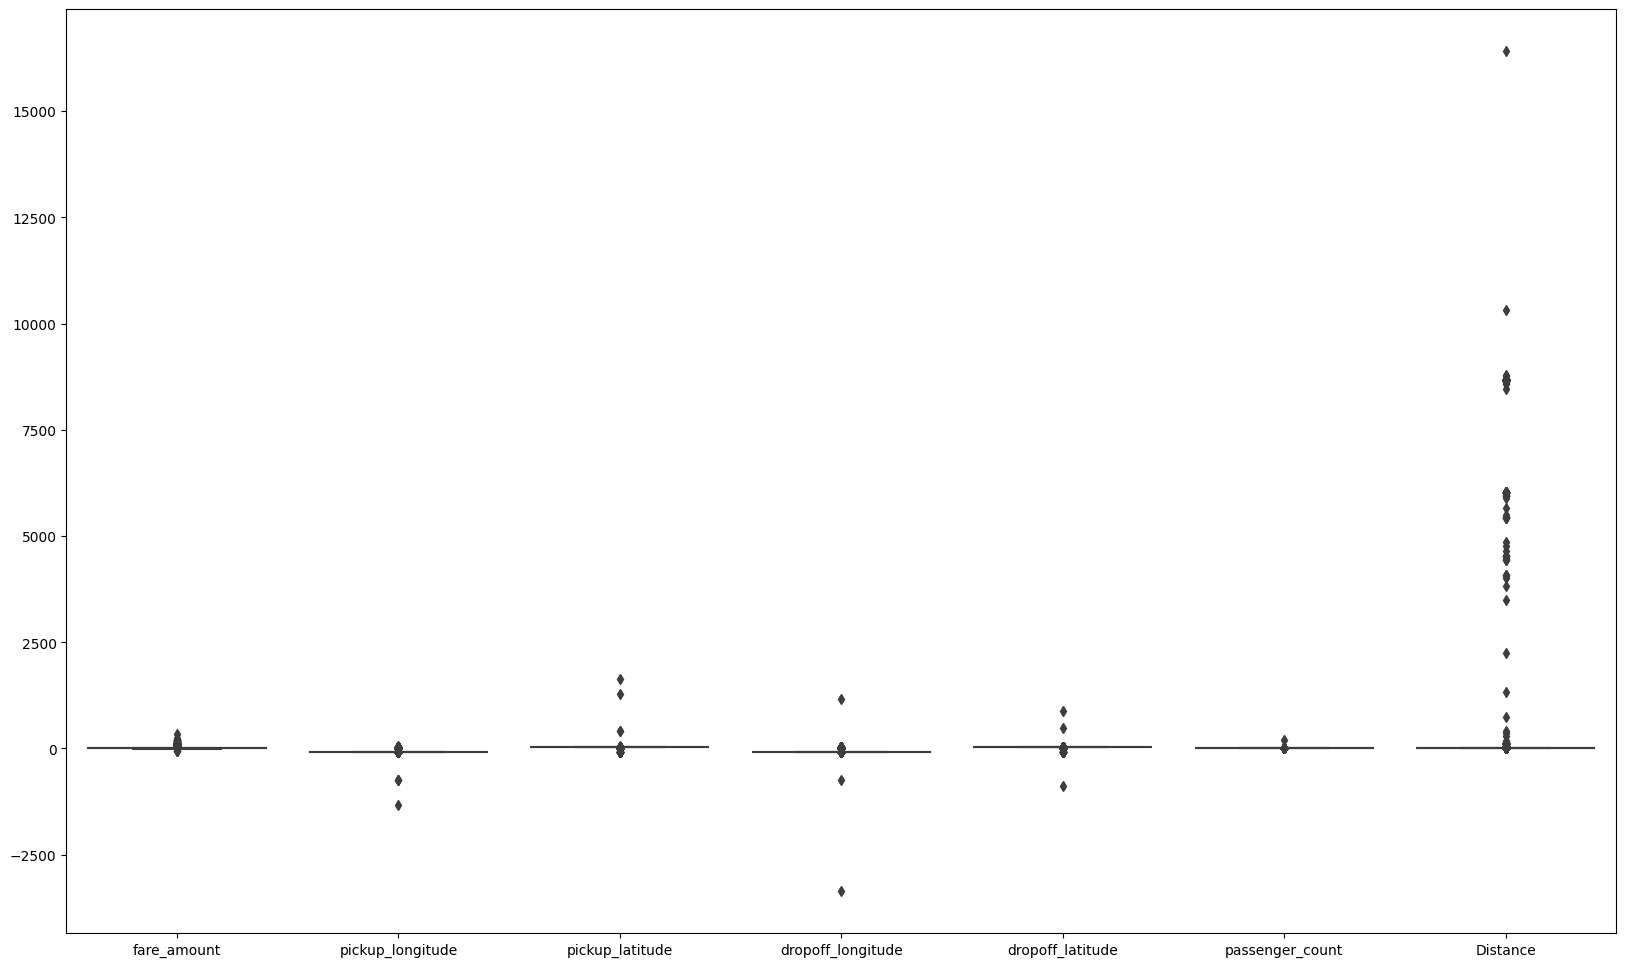

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

In [ ]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

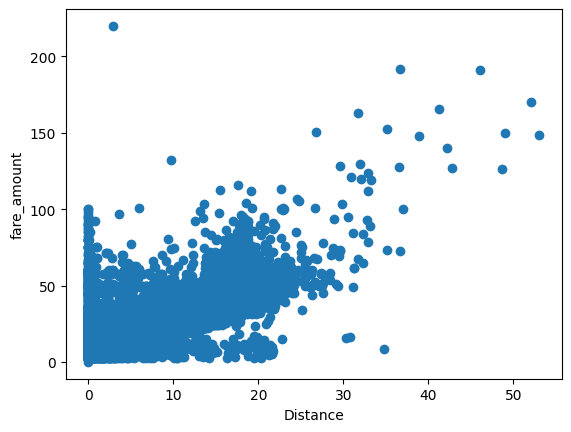

In [ ]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.006461,-0.006109,0.006099,-0.005992,0.008703,0.856739
pickup_longitude,0.006461,1.000000,-0.968885,0.999992,-0.980884,-0.000325,-0.117541
pickup_latitude,-0.006109,-0.968885,1.000000,-0.968886,0.987744,-0.001211,0.112231
dropoff_longitude,0.006099,0.999992,-0.968886,1.000000,-0.980884,-0.000322,-0.117760
dropoff_latitude,-0.005992,-0.980884,0.987744,-0.980884,1.000000,-0.001012,0.110239
passenger_count,0.008703,-0.000325,-0.001211,-0.000322,-0.001012,1.000000,0.005640
Distance,0.856739,-0.117541,0.112231,-0.117760,0.110239,0.005640,1.000000


In [ ]:
X = df['Distance'].values.reshape(-1, 1) #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1) #Dependent Variable

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)
x_std = std.fit_transform(X)
print(x_std)

[[-0.39818951]
 [-0.3774033 ]
 [ 0.16303807]
 ...
 [-0.50212054]
 [-0.08639641]
 [-0.33583089]]
[[-0.43792532]
 [-0.22244751]
 [ 0.49522653]
 ...
 [-0.47454497]
 [ 0.02391121]
 [-0.22556006]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.7322538


In [ ]:
y_pred = l_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred
result.sample(10)

,Actual,Predicted
12831,1.950652,1.548608
17817,-0.460548,-0.139181
12270,-0.086396,-0.609366
12099,-0.502121,-0.530944
12894,-0.398190,-0.373798
13058,-0.626838,-0.519628
2005,-0.294258,-0.327887
19892,0.797017,0.892960
18223,0.121466,-0.315244
4279,-0.211114,-0.030149


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.262544548212097
Mean Absolute % Error: 1.8050231702955626
Mean Squared Error: 0.2641181683224427
Root Mean Squared Error: 0.5139242826744449
R Squared (R²): 0.8557182831431782


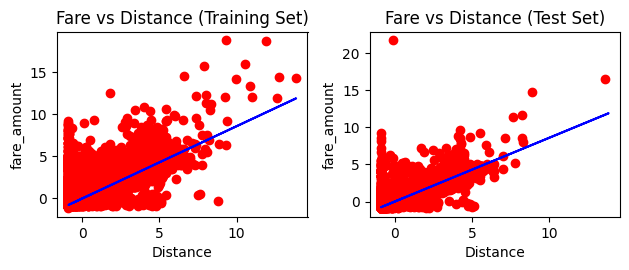

In [ ]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
cols = ['Model', 'RMSE', 'R-Squared']
# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)
# compile the required information
linreg_metrics = pd.DataFrame([[
"Linear Regresion model",
np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)
result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.513924,0.855718


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-44-5abbb8c019d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [ ]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF
result.sample(10)

,Actual,Predicted
23152,-0.709983,-0.758622
25545,3.499224,4.398467
28372,-0.418976,-0.124331
15762,-0.252686,-0.415442
14613,3.842197,2.294456
5829,-0.543693,-0.208204
2195,0.069500,-0.241046
13338,-0.086396,-0.387796
2955,0.329328,-0.291556
24168,-0.709983,-0.535586


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.30386069315946024
Mean Absolute % Error: 1.9428642997373393
Mean Squared Error: 0.3184832495763652
Root Mean Squared Error: 0.5643432019404195
R Squared (R²): 0.822886331449851


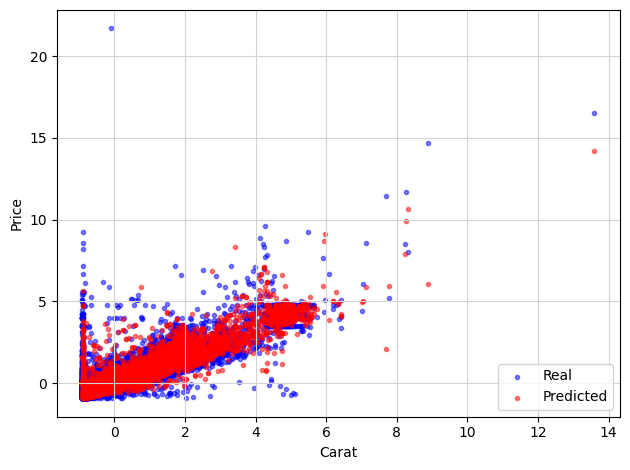

In [ ]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
"Random Forest Regressor model",
np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)
result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.513924,0.855718
1,Random Forest Regressor model,0.564343,0.822886
2,Random Forest Regressor model,0.564343,0.822886
